<a href="https://colab.research.google.com/github/TheAcoff/Notebook-Alura/blob/main/Python%20para%20Data%20Science/Pandas%20-%20Alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercícos propostos pelo curso para o treinamento das funções do Pandas. Com isso utilizaremos dados de alunos com notas, idade e situação de aprovação de cada um deles.

#Análise Preliminar dos Dados

## Formato dos Dados e do Dataframe
Utilizaremos um dataset de alunos importados do github. Primeiro, importamos a biblioteca e o arquivo.csv

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
df = pd.read_csv(url,sep=',')
df.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


Com a primeira visualização dos dados, podemos investigar as características deles. Temos respectivamente o formato, as colunas e informações sobre as variáveis:

In [3]:
df.shape #Formato (linhas,colunas)

(18, 4)

In [4]:
df.columns #Nomes das Colunas

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [5]:
df.info() #Informação das Variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


Observamos que os dados possuem tipos diferentes, tais como:
- String (Nome)
- Inteiro (Idade)
- Float (Notas)
- Boleano (Aprovado)

## Análise estatística preliminar
Com os dados em mãos, pegamos os valores numéricos (float e inteiro), correspondente a Idade e as Notas e listamos, de cada uma delas
- Quantidade
- Média
- Desvio Padrão
- Mínimo
- Q1
- Q2
- Q3
- Máximo

In [6]:
df.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


---

#Tratamento dos Dados

## Tratamento de Dados Nulos
Em primeiro plano, verificamos se a base possui dados nulos, coluna por coluna.

In [7]:
df.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

Vemos que esses dados nulos estão nas notas. Analisando o contexto do nosso dataframe, se um aluno não possuí uma nota registrada, tem o motivo dele não ter recebido essa atribuição, logo, iremos substituir esses valores por zero.

In [8]:
df.fillna(0,inplace = True)
df.isnull().sum()

Nome        0
Idade       0
Notas       0
Aprovado    0
dtype: int64

## Informação Complementar
Foi recebida a informação de que os alunos "Alice" e "Carlos" não fazem mais parte da turma, logo, iremos retirá-los da lista

In [9]:
naoAlunos = ['Alice','Carlos']
df = df.query('@naoAlunos not in Nome')

Verificaremos se os nomes não estão de fato

In [10]:
df.Nome.isin(naoAlunos).sum()

0

Podemos, então, com dados tratados, visualizar a distribuição dos dados utilizando um histograma.

<Axes: ylabel='Frequency'>

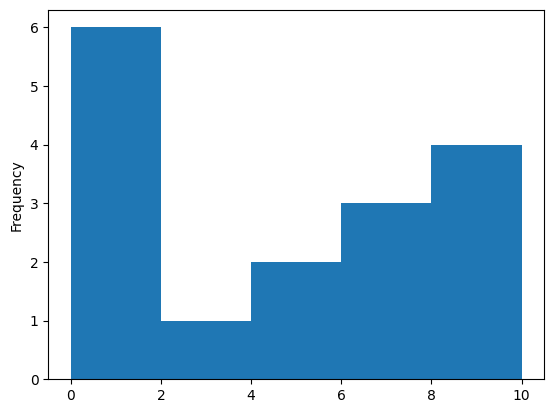

In [11]:
df['Notas'].plot.hist(bins = 5)

## Alunos Aprovados
Criaremos um arquivo com os alunos aprovados, para isso, eles devem ter uma nota igual ou superior a 7.Entretanto, todos que tiveram a nota 7, terão um reajuste de nota para 8.

In [12]:
filtro = df['Aprovado'] == True #Filtro para alunos aprovados

aprovados = df[filtro] #Alunos aprovados
aprovados = aprovados.replace(7.0,8.0) #Reajuste de Notas

aprovados.to_csv('alunos_aprovados.csv',index = False) #Criação do Arquivo
aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


---
# Atividade Extra
 Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles.

In [13]:
df['Pontos_extras'] = df['Notas'] * 0.4
df['Notas_finais'] = df['Notas'] + df['Pontos_extras']
df.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0


Atualizando a lista de aprovados

In [14]:
df['Aprovado_final'] = df['Notas_finais'].apply(lambda x: True if x >= 7 else False)
df.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True


Verificando quais alunos não tinham sido aprovados antes, mas agora, com a nova nota, foram.

In [15]:
filtro2 = (df['Aprovado'] == False) & (df['Aprovado_final'] == True)
differenca = df[filtro2]

differenca['Nome']

3    Denis
Name: Nome, dtype: object

Finalmente, podemos ver a nova distribuição das notas dos alunos.

<Axes: ylabel='Frequency'>

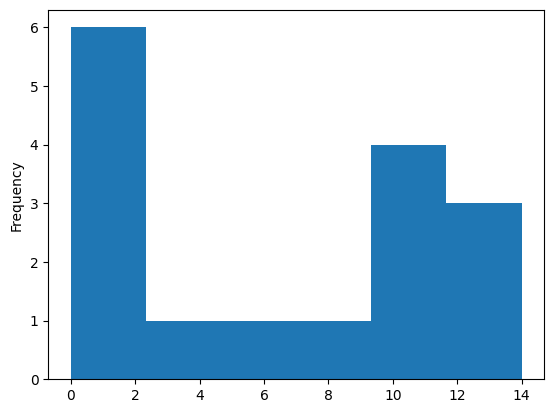

In [16]:
df['Notas_finais'].plot.hist(bins = 6)